# Segretar*

Ok, siete appena stati promossi capi del personale. Ieri sera avete festeggiato. Hooray!
Oggi però c'è la prima gatta da pelare: bisogna assumere un* nuov* segretari*. Abbiamo 100 candidat*, che dobbiamo valutare. Li dobbiamo valutare in sequenza, un* dopo l'altr*. Dopo ciascun colloquio, dobbiamo decidere: assumere \*l\* candidat*, oppure perderl* per sempre, e sotto il prossimo. L'obiettivo che ci viene dato non ammette compromessi: dobbiamo scegliere \*l\* migliore. Ogni volta che intervistiamo un* candidat*, riusciamo a stabilire se sia meglio o peggio di ciascun altr* candidat* valutat*.

Reazioni plausibili:

- "Voglio tornare al mio incarico precedente"
- "E' impossibile"
- "Mi conviene tirare a indovinare"

Approccio più "scientifico": posso fare meglio che scegliere a caso? O che scegliere il primo? O l'ultimo?

Vediamo un po'...

Per prima cosa: proviamo a modellizzare la nostra situazione. Abbiamo 100 candidat*, ciascuno meglio o peggio di ciascun altro, in un ordine che non conosciamo. Possiamo rappresentarli con una lista di numeri, dall'1 al 100, mischiata:

In [1]:
from random import shuffle, seed
seed(1234)
candidati = list(range(100))
shuffle(candidati)

In [2]:
print(candidati)

[71, 80, 18, 26, 55, 51, 27, 98, 6, 75, 83, 7, 84, 20, 53, 25, 58, 72, 28, 67, 49, 36, 94, 46, 43, 63, 16, 38, 40, 66, 50, 47, 48, 13, 37, 39, 70, 91, 92, 90, 24, 57, 9, 21, 96, 60, 32, 73, 42, 33, 29, 89, 68, 15, 17, 22, 54, 87, 77, 41, 93, 35, 52, 34, 5, 65, 76, 69, 81, 8, 31, 62, 64, 1, 97, 23, 95, 19, 59, 78, 61, 79, 82, 44, 86, 3, 2, 30, 45, 12, 10, 88, 85, 4, 74, 11, 0, 14, 56, 99]


Ok, ora dobbiamo modellizzare il processo di intervista. Un'idea potrebbe essere: rispetto a questa rappresentazione, intervistare vuol dire conoscere il punteggio dell'intervistato. Questo però non sarebbe molto fedele alla descrizione della situazione, perché avrei più informazione di quella semplicemente "comparativa" tra i candidati. Esempio: se mi viene fuori 100 al primo colpo, so che quel candidato è il migliore di tutti. In una situazione di questo tipo, la strategia vincente sarebbe facile: intervista uno a uno, e prendi quello che ha 100.

Ci serve una funzione che, dato il numero `n`, ci dica come si posizione il candidato n-simo rispetto agli altri indicati fino ad ora.
La funzione che fa al caso nostro è:

In [3]:
def valuta(n, candidati):
    return sorted(candidati[:n+1], reverse=True).index(candidati[n])

Ok, proviamo a giocarci un po', e intervistiamo il nostro primo candidato. Che risultato vi aspettate?

In [4]:
valuta(0, candidati)

0

`0` vuol dire che questo è il miglior candidato ascoltato fino ad ora! Lo prendiamo? Magari il secondo è migliore! Proviamo:

In [5]:
valuta(1, candidati)

0

Esatto, il secondo è il migliore tra i primi due! Lo prendiamo?

In [6]:
valuta(2, candidati)

2

Come possiamo elaborare una strategia? Una famiglia di strategie potrebbe essere: non scegliamo il primo. Perché? Perché è improbabile che il primo sia il migliore. D'altra parte, non aspettiamo di scegliere l'ultimo, sperando sempre in qualcosa di meglio. Dal punto di vista probabilistico, decidere "a priori" di prendere il primo o l'ultimo, o l'n-simo, è la stessa cosa: ho sempre 1/100 di probabilità di scegliere il migliore. Posso fare di meglio? Potrei decidere di ascoltare i primi n, e poi prendere il primo che li supera!

Questo, con la nostra funzione, equivarebbe a chiamare in sequenza `valuta(n)`, `valuta(n+1)`, e così via, finché mi esce uno `0`. Se non mi esce uno `0` fino alla fine? Vuol dire che il migliore era tra i primi `n`, e ho perso. Ricordiamoci che in questo gioco, scegliere il 2o o non scegliere è equivalente, ho comunque perso. 

Ok, immaginiamo di prendere `n` uguale a `5`. Come faccio a vedere se in questo caso la mia strategia sarebbe vincente? Semplice: devo vedere a che punteggio corrisponde il primo `i` per cui `valuta(i, candidati) == 0`. Se `candidati[i] == 100`, allora ho vinto (ho scelto il migliore), altrimenti ho perso. 

In [7]:
def seleziona(n, candidati):
    for i in range(n, 100):
        if valuta(i, candidati) == 0:
            return i

In [8]:
seleziona(5, candidati)

7

In [9]:
candidati[7]

98

Peccato, in questo caso avrei perso!
Generiamo un altro set di candidati (cioè rimescoliamo quelli che abbiamo)

In [10]:
shuffle(candidati)

In [11]:
seleziona(5, candidati)

60

In [12]:
candidati[60]

99

Grande, abbiamo vinto! Ok, ora vogliamo chiederci: quanto è buono 5, come valore di soglia? Facciamo questo esperimento: proviamo per 1000 candidati a cercare il meglio con 5, e vediamo quante volte abbiamo fortuna.

In [13]:
def esperimento():
    candidati = list(range(100))
    shuffle(candidati)
    scelto = seleziona(5, candidati)
    if scelto and candidati[scelto] == 99:
        return True
    else:
        return False

In [14]:
esperimento()

False

In [15]:
esperimenti = [esperimento() for _ in range(1000)]

In [16]:
sum(esperimenti)

146

Ok, con la soglia di 5 abbiamo trovato il migliore 146 volte su 1000. Per provare con 6, generalizziamo la nostra funzione `esperimento`:

In [17]:
def esperimento(soglia):
    candidati = list(range(100))
    shuffle(candidati)
    scelto = seleziona(soglia, candidati)
    if scelto and candidati[scelto] == 99:
        return True
    else:
        return False

In [18]:
esperimenti = [esperimento(6) for _ in range(1000)]

In [19]:
sum(esperimenti)

170

Sembra meglio! Ok, generalizziamo anche gli esperimenti multipli:

In [20]:
def esperimenti(soglia):
    return sum(esperimento(soglia) for _ in range(1000))

In [21]:
esperimenti(7)

208

In [22]:
from tqdm import tqdm
performances = [esperimenti(n) for n in tqdm(range(1, 100))]

100%|██████████| 99/99 [00:32<00:00,  3.02it/s]


In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

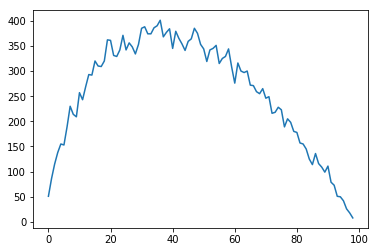

In [24]:
plt.plot(performances)

Sembra che ci sia un massimo! Per quale valore della soglia sarà? Per scoprirlo, ci serve "lisciare" un po' la curva, cosa che possiamo fare aumentando il numero di esperimenti. Rendiamolo parametrico

In [25]:
def esperimenti(soglia, n=1000):
    return sum(esperimento(soglia) for _ in range(n))

In [26]:
performances = [esperimenti(n, 100000) for n in tqdm(range(1, 100))]

100%|██████████| 99/99 [2:06:45<00:00, 76.83s/it]


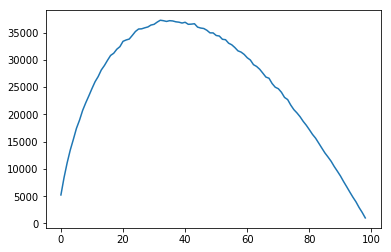

In [27]:
plt.plot(performances)

Questa sembra più "smooth"... cerchiamo il massimo?

In [28]:
max(performances)

37254

Cioè il meglio che riusciamo a fare è scegliere *l* miglior* il 37% delle volte (ricordate che la popolazione degli esperimenti ha cardinalità 10000)

E vediamo un po': qual è il valore di soglia ottimo?

In [29]:
performances.index(max(performances))

32

Quindi il meglio lo si ottiene per un valore di soglia di 32, in corrispondenza del quale si sceglie il migliore il 37% delle volte.

### Esercizi

1. Cosa cambia se invece di infrattarsi col migliore si considera ammissibile scegeliere anche il secondo?
2. Cosa cambia se si ammette di poter scegliere anche il penultimo intervistato?